# STAT 207 Lab 8: Inference for Associations - [25 total points] - Solutions

Due: Wednesday, March 31 11:59pm CST



## <u>Case Study 1</u>: U.S Unemployment Rates and Metropolitan Areas
In this lab we will explore the statistical concepts that we've learned this week while also examining the RELATIONSHIP between **unemployment rates** and **whether the county is a metropolitan county or not** in the U.S. 

The **metro** variable indicates "yes" if the county is a metropolitan area and indicates "no" otherwise.

## <u>Case Study 2</u>: U.S Median Education Levels and Metropolitan Areas
Also in this lab we will explore the statistical concepts that we've learned this week while also examining the RELATIONSHIP between **median educataion level** and **whether the county is a metropolitan county or not** in the U.S. 

### Imports

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## 1. <u>Preliminaries</u>

### 1.1 [0.5pt] Read the county.csv into a dataframe, call it df, and display the first five rows.

Remember that 'data unavailable' represents missing values in this csv. Make sure you encode these values as NaN when you read the data in.

In [2]:
df = pd.read_csv("county.csv")
df = df.replace('data unavailable','NaN')
df.head()

,name,state,pop2000,pop2010,pop2017,pop_change,poverty,homeownership,multi_unit,unemployment_rate,metro,median_edu,per_capita_income,median_hh_income,smoking_ban
0,Autauga County,Alabama,43671,54571,55504,1.48,13.7,77.5,7.2,3.86,yes,some_college,27841.7,55317,none
1,Baldwin County,Alabama,140415,182265,212628,9.19,11.8,76.7,22.6,3.99,yes,some_college,27779.85,52562,none
2,Barbour County,Alabama,29038,27457,25270,-6.22,27.2,68.0,11.1,5.9,no,hs_diploma,17891.73,33368,partial
3,Bibb County,Alabama,20826,22915,22668,0.73,15.2,82.9,6.6,4.39,yes,hs_diploma,20572.05,43404,none
4,Blount County,Alabama,51024,57322,58013,0.68,15.6,82.0,3.7,4.02,yes,hs_diploma,21367.39,47412,none


### 1.2 [0.5pt] Create a dataframe that is just comprised of the metro variable,  the unemployment rates variable, and the median_edu variable. Then drop all missing values from this dataframe.

In [71]:
missing_values = ['data unavailable']
df_pew = pd.read_csv("county.csv", na_values=missing_values)
df_pew2 = df_pew.dropna()
df_3 = df_pew2[["metro","unemployment_rate","median_edu"]]

### 1.3 [0.5pt] How many counties are metropolitan counties and how many are not?

In [177]:
df_pew2["metro"].value_counts()

no     1614
yes     945
Name: metro, dtype: int64

### 1.4 [0.5pt] Next, split this dataframe into two population dataframes:
1. <u>Population 1</u>:the counties that are metropolitan areas
2. <u>Population 2</u>:the counties that are not metropolitan areas


In [136]:
population_yes = df_3[df_3["metro"] == "yes"]

In [137]:
population_no = df_3[df_3["metro"] == "no"]

### 1.5 [0.5pt] Calculate the mean and standard deviation unemployment rates for these two populations.

In [155]:
population_1 = population_yes["unemployment_rate"]
population_2 = population_no["unemployment_rate"]
population_1.mean()

4.362338624338625

In [156]:
population_1.std()

1.3299419079164427

In [157]:
population_2.mean()

4.740235439900867

In [158]:
population_2.std()

1.8344364374673146

### 1.6 [0.5pt] Finally, calculate the proportion of counties in the metro population that have a median education level of high school diploma and  calculate the proportion of counties in the non-metro population that have a median education level of high school diploma.

In [78]:
pd.crosstab(df_pew2["median_edu"],df_pew2["metro"])

metro,no,yes
median_edu,,
bachelors,7,30
below_hs,1,0
hs_diploma,913,273
some_college,693,642


In [80]:
273/df_pew2[df_pew2["metro"] == "yes"].shape[0]

0.28888888888888886

In [81]:
913/df_pew2[df_pew2["metro"] == "no"].shape[0]

0.5656753407682775

## 2. Numerical Sample Analysis

### 2.1 [1 pt] Collect a random sample of 40 metropolitan counties (using a random state of 100 without replacement) and do the following.
a. calculate the sample mean and standard deviation of the unemployment rate

b. plot the sample distribution of unemployment rates.

In [145]:
df_sample=population_yes.sample(40,replace=False,random_state=100)

In [146]:
df_sample["unemployment_rate"].mean()

4.2909999999999995

In [147]:
df_sample["unemployment_rate"].std()

1.0610850759771993

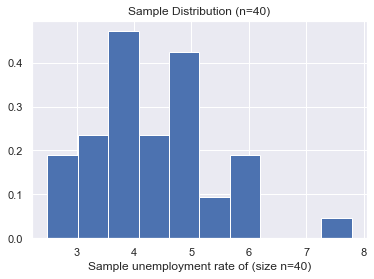

In [148]:
df_sample["unemployment_rate"].hist(density=True)
plt.title('Sample Distribution (n=40)')
plt.xlabel('Sample unemployment rate of (size n=40)')
plt.show()

### 2.2 [1 pt] Collect a random sample of 50 non-metropolitan counties (using a random state of 100 without replacement) and do the following.
a. calculate the sample mean and standard deviation of the unemployment rate

b. plot the sample distribution of unemployment rates.

In [149]:
df_sample2=population_no.sample(50,replace=False,random_state=100)

In [150]:
df_sample2["unemployment_rate"].mean()

5.2088

In [151]:
df_sample2["unemployment_rate"].std()

2.0508640687699

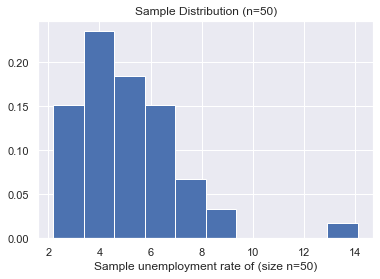

In [152]:
df_sample2["unemployment_rate"].hist(density=True)
plt.title('Sample Distribution (n=50)')
plt.xlabel('Sample unemployment rate of (size n=50)')
plt.show()

## 3. Sampling Distribution (of sample mean differences) Analysis

Assume that you have access to the populations you created in #1 in this part.

### 3.1 [1 pt] Calculate the mean and standard deviation of the sampling distribution of sample mean differences (ie. $\bar{x}_{metro}-\bar{x}_{nonmetro}$ values)

In [159]:
difference_mean = population_1.mean() - population_2.mean()
difference_mean

-0.3778968155622424

In [190]:
difference_std = np.sqrt((population_1.std()**2)/945 + (population_2.std()**2)/1614)
difference_std

0.06290205018580504

### 3.2 [1 pt] Using the sample mean values $\bar{x}_{metro}$ and $\bar{x}_{nonmetro}$ that you calculated in #2, calculate the z-score of  $(\bar{x}_{metro}-\bar{x}_{nonmetro})$.

In [192]:
z_score = (df_sample["unemployment_rate"].mean()-df_sample2["unemployment_rate"].mean()) - difference_mean / difference_std
z_score

5.089902681327253

## 4. Association Testing for Metro Areas and Unemployment Rate

**<font color="green">Now, assume that we do not know anything about the populations from #1.</font>**

We would like to test if there is an association between whether or not a county is a metropolitan area and the unemployment rate. Or in other words, we would like to see if we have enough evidence to suggest that the mean unemployment rate of all metropolitan counties is different from the mean unemployment rate of all non-metropolitan counties.

We will use the two samples we collected from #2 to help us conduct this test.

### 4.1 [1 pt] Set up the hypotheses for this test.

Null hypothesis: metro mean - nonmetro mean = 0
Alternative hypothesis: metro mean - nonmetro mean != 0 

### 4.2 [2 pt] Check the conditions for conducting inference on these hypotheses.

sample with metro counties is randomly sampled.
sample size of metro counties is 40 < 10% of all metro US counties.
sample size of metro counties is 40 > 30.
sample with nonmetro counties is randomly sampled.
sample size of metro counties is 50 < 10% of all nonmetro US counties.
sample size of nonmetro counties is 50 > 30.
We can assume that there is no pairwise relationship between whether or not a county is a metropolitan area and the unemployment rate.

### 4.3 [1.5 pt] Calculate a 90% confidence interval for $\mu_{metro}-\mu_{nonmetro}$.

**Note:** You should use the most *accurate* way of calulating this confidence interval that we know now.

In [162]:
from scipy.stats import t
t_score = min(50-1,40-1)

In [163]:
critical_value=t.ppf(0.95, df=t_score)
print('Critical Value: ',critical_value)

Critical Value:  1.6848751194973992


In [164]:
point_estimate=df_sample["unemployment_rate"].mean() - df_sample2["unemployment_rate"].mean()
print('Point Estimate: ', point_estimate)

Point Estimate:  -0.9178000000000006


In [166]:
standard_error=np.sqrt((df_sample["unemployment_rate"].std()**2)/40 + (df_sample2["unemployment_rate"].std()**2)/50)
print('Standard Error: ', standard_error)

Standard Error:  0.3350647803529446


In [167]:
lower_bound=point_estimate-critical_value*standard_error
upper_bound=point_estimate+critical_value*standard_error

print('90% Confidence Interval:', lower_bound,upper_bound)

90% Confidence Interval: -1.482342311836538 -0.35325768816346326


### 4.4 [1 pt] Use this 90% confidence interval to make a conclusion about your hypotheses.

We are 90% confident that metro mean - nonmetro mean is bwtween -1.4823 and -0.3533

### 4.5 [1.5 pt] Calculate the p-value for this hypothesis test.

**Note:** You should use the most *accurate* way of calulating this p-value that we know now.

In [168]:
test_stat=(point_estimate-0)/standard_error
print('Test statistic (ie. t-score of the point estimate):',test_stat)

Test statistic (ie. t-score of the point estimate): -2.7391718074135536


In [169]:
pvalue=2*(1-t.cdf(np.abs(test_stat), df=t_score))

print('p-value: ',pvalue)

p-value:  0.00923820846467338


### 4.6 [1 pt] Use this p-value to make a conclusion about your hypotheses, using a significance level of $\alpha=0.10$.

Because  𝑝−𝑣𝑎𝑙𝑢𝑒=0.009 < 0.10 , we reject the null hypothesis. Thus, we have sufficient evidence to suggest that  metro mean - nonmetro mean ≠0  (or that there is an association between whether or not a county is a metropolitan area and the unemployment rate).

## 5. Categorical Samples Analysis

### [0.5 pt] 5.1 Using your metro and non-metro samples from #2, do the following.
a. calculate the proportion of counties in the metro sample in which the a median education level is a high school diploma.

b. calculate the proportion of counties in the nonmetro sample in which the a median education level is a high school diploma.

In [174]:
df_sample[df_sample["median_edu"] == "hs_diploma"].shape[0]/df_sample.shape[0]

0.225

In [176]:
df_sample2[df_sample2["median_edu"] == "hs_diploma"].shape[0]/df_sample2.shape[0]

0.72

## 6. Sampling Distribution (of Sample Proportion Differences) Analysis

Assume that you have access to the populations you created in #1 in this part.

### 6.1 [1 pt] Calculate the mean and standard deviation of the sampling distribution of sample proportion differences (ie. $\hat{p}_{metro}-\hat{p}_{nonmetro}$ values)

In [185]:
population_yes.shape[0]/df_pew2.shape[0] - population_no.shape[0]/df_pew.shape[0]

-0.1444006736996693

In [187]:
np.sqrt((945/2559)*(1-(945/2559))/945 + (1614/2559)*(1-(1614/2559))/1614)

0.01976809670956114

### 6.2 [1 pt] Using the sample proportion values $\hat{p}_{metro}$ and $\hat{p}_{nonmetro}$ that you calculated in #2, calculate the z-score of  $(\hat{p}_{metro}-\hat{p}_{nonmetro})$.

In [194]:
z_score2 = (0.025-0.72) - (-0.1444006) / (0.01976)
z_score2

6.612722672064777

## 7. Association Testing for Metro Areas and Median Education Level

**<font color="green">Now, assume that we do not know anything about the populations from #1.</font>**

We would like to test if there is an association between whether or not a county is a metropolitan area and the median education level. Or in other words, we would like to see if we have enough evidence to suggest that the proportion of all metropolitan counties that have a median education level of high school diploma is different from the proportion of all nonmetropolitan counties that have a median education level of high school diploma.

We will use the two samples we collected from #2 to help us conduct this test.

### 7.1 [1 pt] Set up the hypotheses for this test.

Null hypothesis: metro probability - nonmetro probability = 0
Alternative hypothesis: metro probability - nonmetro probability != 0 
metro probability:proportion of all metropolitan counties that have a median education level of high school diploma
nonmetro probability:proportion of all nonmetropolitan counties that have a median education level of high school diploma.

### 7.2 [2 pt] Check the conditions for conducting inference on these tests.

2559

1.40(0.225)=9 < 10 and 40(1-0.225)=31 >=10
2.50(0.720)=36 >= 10 and 50(1-0.720)=14 >= 10
3.Sample of metro counties is randomly selected and sample size = 40 < 10% of all US metro counties
4..Sample of nonmetro counties is randomly selected and sample size = 50 < 10% of all US nonmetro counties
5.Sample of US metro counties is independent from sample of US nonmetro counties

### 7.3 [1.5 pt] Calculate a 88% confidence interval for $p_{metro}-p_{nonmetro}$.


In [9]:
from scipy.stats import norm
critical_value=norm.ppf(0.94)
print('Critical Value:', critical_value)

Critical Value: 1.5547735945968535


In [10]:
point_estimate=0.225-0.72
print('Point Estimate:', point_estimate)

Point Estimate: -0.495


In [11]:
standard_error = np.sqrt(0.225*(1-0.225)/40 + 0.72*(1-0.72)/50)
print('Standard Error:', standard_error)

Standard Error: 0.09160444858193297


In [12]:
lower_bound=point_estimate-critical_value*standard_error
upper_bound=point_estimate+critical_value*standard_error

print('88% Confidence Interval:', lower_bound,upper_bound)

88% Confidence Interval: -0.6374241778027946 -0.3525758221972054


### 7.4 [1 pt] Use this 88% confidence interval to make a conclusion about your hypotheses.

Because the null value (0) for these hypothesis is not in the confidence interval range, we reject the null hypothesis. Thus we do have sufficient evidence to suggest that  𝑝𝑑𝑒𝑚−𝑝𝑟𝑒𝑝≠0  (or in other words there is an association between political party and approval for the direction that the country is going in in 2017 for all adults living in the U.S.)

### 7.5 [1.5 pt] Calculate the p-value for this hypothesis test.


In [13]:
test_statistic=(point_estimate-0)/standard_error
print('Test Statistic (ie. the z-score of the point estimate):', test_statistic)

Test Statistic (ie. the z-score of the point estimate): -5.403667700234683


In [14]:
pvalue=2*(1-norm.cdf(np.abs(test_statistic)))

print('p-value:', pvalue)

p-value: 6.529185414549943e-08


In [15]:
pvalue < 0.12

True

### 7.6 [0.5 pt] Use this p-value to make a conclusion about your hypotheses, using a significance level of $\alpha=0.12$.

Because p−value=6.520e-08 < a=0.12, we reject the null hypothesis. Thus we do have sufficient evidence to suggest that metro probability − nonmetro propability≠0 .